In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, Normalizer
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import SelectFromModel
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
import lightgbm as lgb
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler, RobustScaler, PowerTransformer
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import VotingClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# **LOADING THE DATASETS**

In [2]:
train_df = pd.read_csv("/kaggle/input/crime-cast-forecasting-crime-categories/train.csv")
test_df = pd.read_csv("/kaggle/input/crime-cast-forecasting-crime-categories/test.csv")

# **EXPLORATORY DATA ANALYSIS**

In [3]:
train_df.shape

(20000, 22)

In [4]:
train_df.columns

Index(['Location', 'Cross_Street', 'Latitude', 'Longitude', 'Date_Reported',
       'Date_Occurred', 'Time_Occurred', 'Area_ID', 'Area_Name',
       'Reporting_District_no', 'Part 1-2', 'Modus_Operandi', 'Victim_Age',
       'Victim_Sex', 'Victim_Descent', 'Premise_Code', 'Premise_Description',
       'Weapon_Used_Code', 'Weapon_Description', 'Status',
       'Status_Description', 'Crime_Category'],
      dtype='object')

In [5]:
test_df.shape

(5000, 21)

In [6]:
train_df.head()

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description,Crime_Category
0,4500 CARPENTER AV,NaN,34.1522,-118.3910,03/09/2020 12:00:00 AM,03/06/2020 12:00:00 AM,1800.0,15.0,N Hollywood,1563.0,...,75.0,M,W,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
1,45TH ST,ALAMEDA ST,34.0028,-118.2391,02/27/2020 12:00:00 AM,02/27/2020 12:00:00 AM,1345.0,13.0,Newton,1367.0,...,41.0,M,H,216.0,SWAP MEET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes
2,600 E MARTIN LUTHER KING JR BL,NaN,34.0111,-118.2653,08/21/2020 12:00:00 AM,08/21/2020 12:00:00 AM,605.0,13.0,Newton,1343.0,...,67.0,M,B,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,Property Crimes
3,14900 ORO GRANDE ST,NaN,34.2953,-118.4590,11/08/2020 12:00:00 AM,11/06/2020 12:00:00 AM,1800.0,19.0,Mission,1924.0,...,61.0,M,H,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
4,7100 S VERMONT AV,NaN,33.9787,-118.2918,02/25/2020 12:00:00 AM,02/25/2020 12:00:00 AM,1130.0,12.0,77th Street,1245.0,...,0.0,X,X,401.0,MINI-MART,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes


In [7]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               20000 non-null  object 
 1   Cross_Street           3448 non-null   object 
 2   Latitude               20000 non-null  float64
 3   Longitude              20000 non-null  float64
 4   Date_Reported          20000 non-null  object 
 5   Date_Occurred          20000 non-null  object 
 6   Time_Occurred          20000 non-null  float64
 7   Area_ID                20000 non-null  float64
 8   Area_Name              20000 non-null  object 
 9   Reporting_District_no  20000 non-null  float64
 10  Part 1-2               20000 non-null  float64
 11  Modus_Operandi         17259 non-null  object 
 12  Victim_Age             20000 non-null  float64
 13  Victim_Sex             17376 non-null  object 
 14  Victim_Descent         17376 non-null  object 
 15  Pr

In [8]:
print(train_df.describe())

           Latitude     Longitude  Time_Occurred       Area_ID  \
count  20000.000000  20000.000000   20000.000000  20000.000000   
mean      33.940704   -117.893072    1352.380350     10.834250   
std        2.126810      7.377726     646.100291      6.033166   
min        0.000000   -118.663400       1.000000      1.000000   
25%       34.009200   -118.429700     930.000000      6.000000   
50%       34.058700   -118.323000    1430.000000     11.000000   
75%       34.165025   -118.274400    1900.000000     16.000000   
max       34.328100      0.000000    2359.000000     21.000000   

       Reporting_District_no      Part 1-2    Victim_Age  Premise_Code  \
count           20000.000000  20000.000000  20000.000000  20000.000000   
mean             1129.599200      1.418150     30.135000    297.176950   
std               603.330519      0.493267     21.863645    212.007298   
min               101.000000      1.000000     -2.000000    101.000000   
25%               632.000000      1

In [9]:
print(train_df.dtypes)

Location                  object
Cross_Street              object
Latitude                 float64
Longitude                float64
Date_Reported             object
Date_Occurred             object
Time_Occurred            float64
Area_ID                  float64
Area_Name                 object
Reporting_District_no    float64
Part 1-2                 float64
Modus_Operandi            object
Victim_Age               float64
Victim_Sex                object
Victim_Descent            object
Premise_Code             float64
Premise_Description       object
Weapon_Used_Code         float64
Weapon_Description        object
Status                    object
Status_Description        object
Crime_Category            object
dtype: object


Location: Street address of the crime incident.
Cross_Street: Cross street of the rounded address.
Latitude: Latitude coordinates of the crime incident.
Longitude: Longitude coordinates of the crime incident.
Date_Reported: Date the incident was reported.
Date_Occurred: Date the incident occurred.
Time_Occurred: Time the incident occurred in 24-hour military time.
Area_ID: LAPD's Geographic Area number.
Area_Name: Name designation of the LAPD Geographic Area.
Reporting_District_no: Reporting district number.
Part 1-2: Crime classification.
Modus_Operandi: Activities associated with the suspect.
Victim_Age: Age of the victim.
Victim_Sex: Gender of the victim.
Victim_Descent: Descent code of the victim.
Premise_Code: Premise code indicating the location of the crime.
Premise_Description: Description of the premise code.
Weapon_Used_Code: Weapon code indicating the type of weapon used.
Weapon_Description: Description of the weapon code.
Status: Status of the case.
Status_Description: Description of the status code.
Crime_Category: The category of the crime (Target Variabl

MAJOR CATEGORICAL DATA

# MISSING VALUES IN TRAIN

Cross_Street           16552
Weapon_Description     12665
Weapon_Used_Code       12665
Modus_Operandi          2741
Victim_Descent          2624
Victim_Sex              2624
Premise_Description        5
dtype: int64


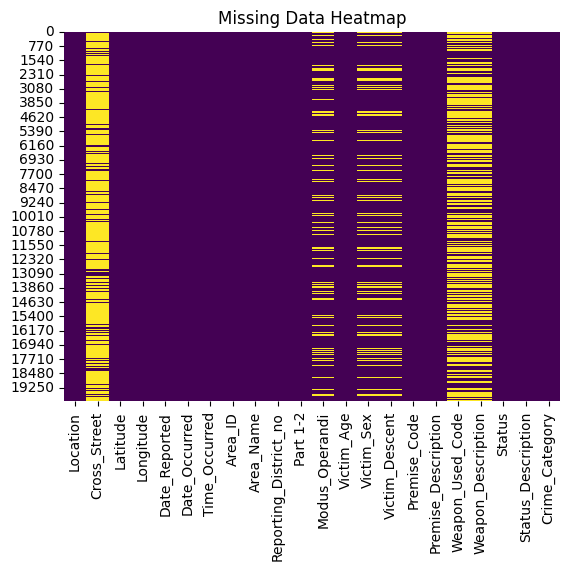

In [10]:
missing_data = train_df.isnull().sum().sort_values(ascending=False)
print(missing_data[missing_data > 0])

sns.heatmap(train_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

# MISSING VALUES IN TEST

Cross_Street           4190
Weapon_Description     3153
Weapon_Used_Code       3153
Modus_Operandi          684
Victim_Descent          643
Victim_Sex              643
Premise_Description       1
dtype: int64


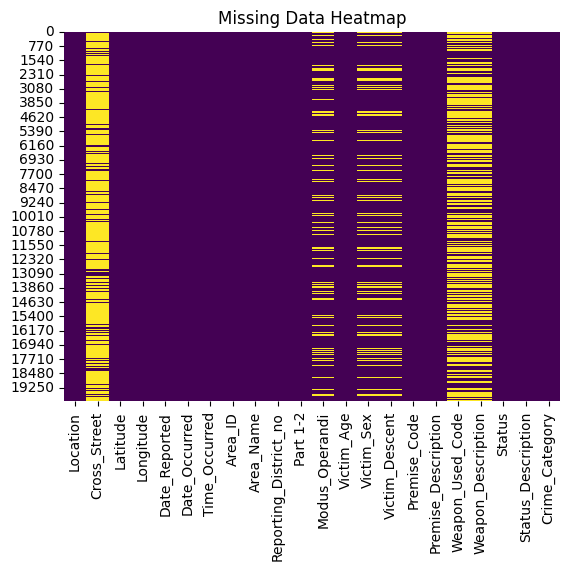

In [11]:
missing_data = test_df.isnull().sum().sort_values(ascending=False)
print(missing_data[missing_data > 0])

sns.heatmap(train_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

# FINDING OUTLIERS IN RELATION BETWEEN CRIME_CATEGORY AND VICTIME_AGE

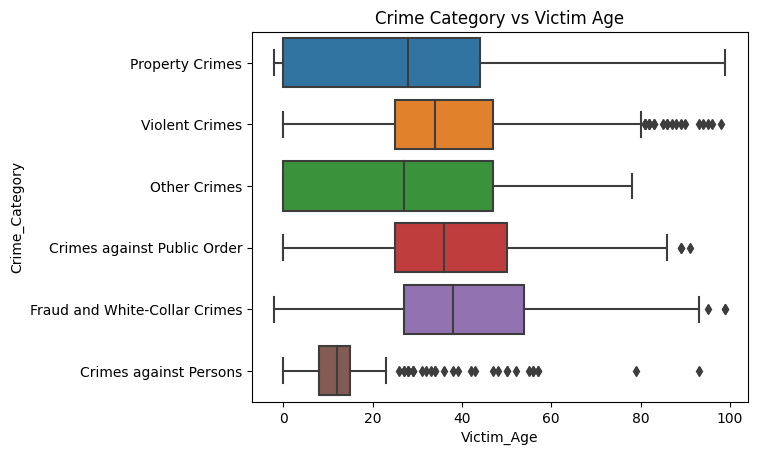

In [12]:
sns.boxplot(data=train_df, y='Crime_Category', x='Victim_Age')
plt.title('Crime Category vs Victim Age')
plt.show()

PROPERTY CRIMES HAVE NO OUTLIERS

# VICTIM GENDER AND DESCENT DISTRIBUTION

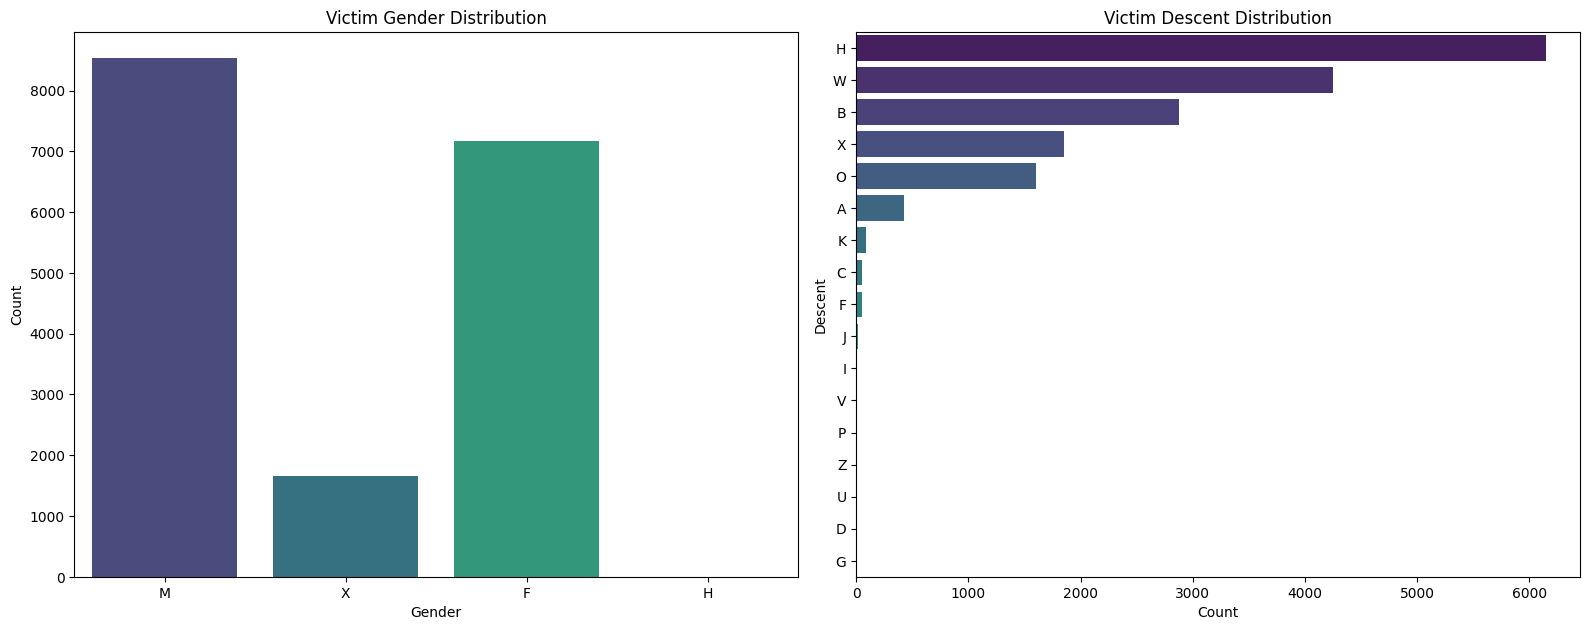

In [13]:
plt.figure(figsize=(16, 12))

plt.subplot(2, 2, 3)
sns.countplot(data=train_df, x='Victim_Sex', palette='viridis')
plt.title('Victim Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.subplot(2, 2, 4)
sns.countplot(data=train_df, y='Victim_Descent', order=train_df['Victim_Descent'].value_counts().index, palette='viridis')
plt.title('Victim Descent Distribution')
plt.xlabel('Count')
plt.ylabel('Descent')

plt.tight_layout()
plt.show()

MOST VICTIMS ARE MEN, ALONG WITH 'H' DESCENT

# EDA GRAPHS

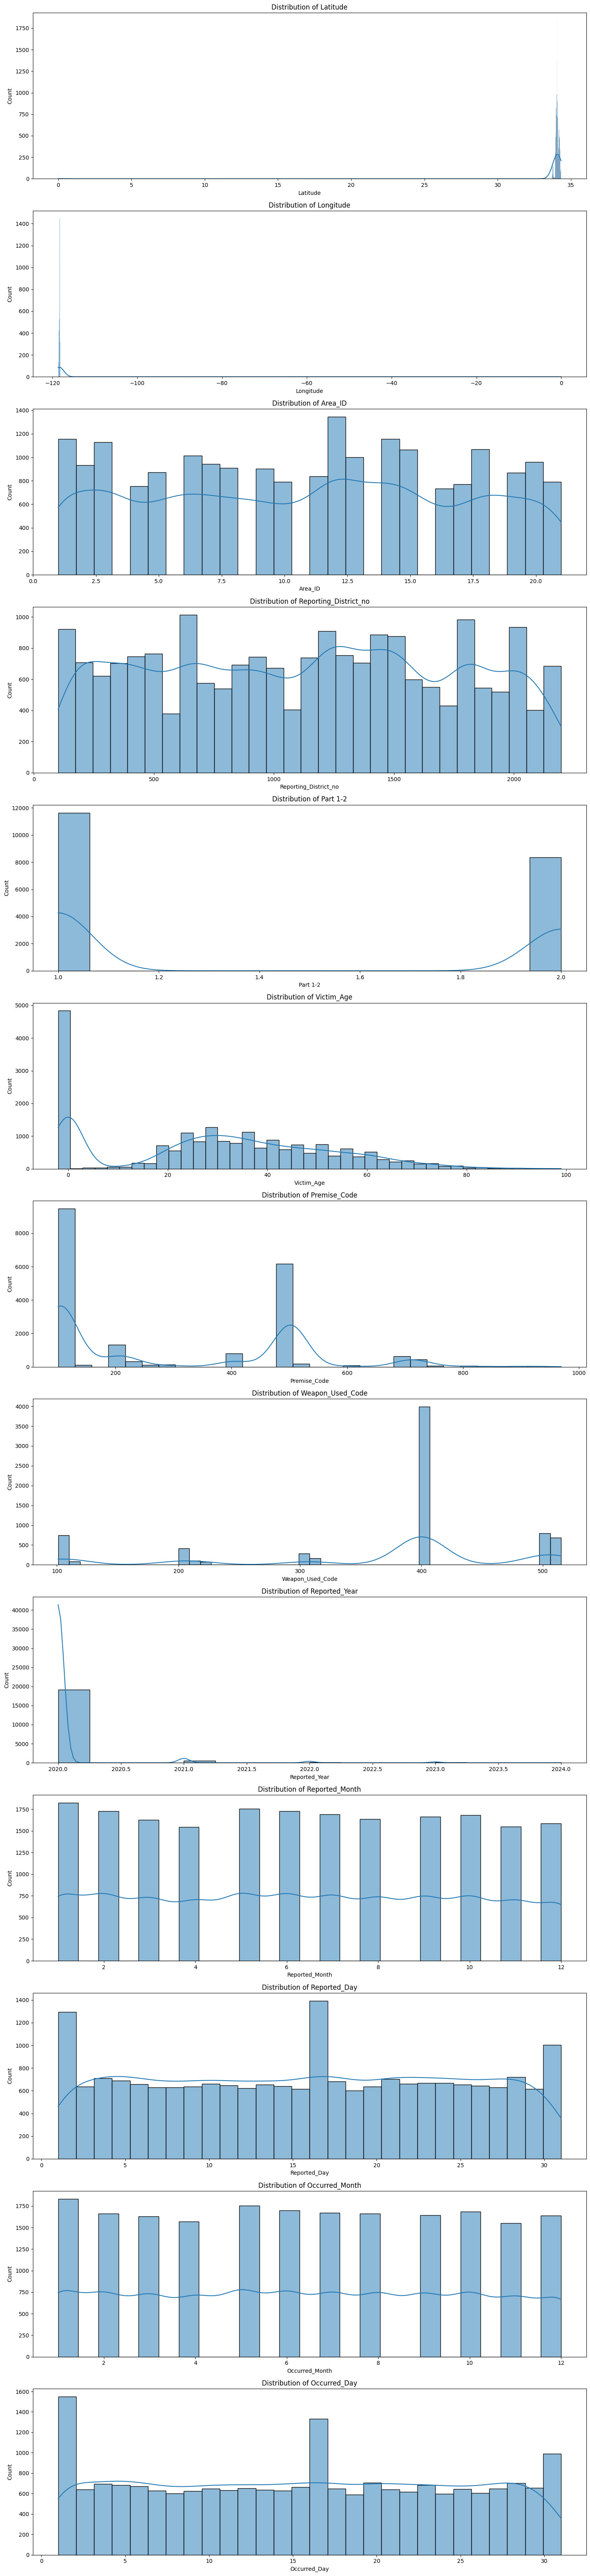

In [49]:
def extensive_eda(df):
    num_features = df.select_dtypes(include=['int64', 'float64']).columns
    fig, axes = plt.subplots(len(num_features), 1, figsize=(15, 5*len(num_features)))
    for i, feature in enumerate(num_features):
        sns.histplot(df[feature], ax=axes[i], kde=True)
        axes[i].set_title(f'Distribution of {feature}')
    plt.tight_layout()
    plt.show()
extensive_eda(train_df)

DISPARITY IN LAT, LONG, AREA,TIME, VICTIM AGE

# **HANDLING TIME SERIES VALUES**

In [50]:
train_df['Date_Reported'] = pd.to_datetime(train_df['Date_Reported'], errors='coerce')
train_df['Date_Occurred'] = pd.to_datetime(train_df['Date_Occurred'], errors='coerce')
train_df['Time_Occurred'] = pd.to_datetime(train_df['Time_Occurred'], format='%H:%M:%S', errors='coerce').dt.time

train_df['Reported_Year'] = train_df['Date_Reported'].dt.year.astype(float)
train_df['Reported_Month'] = train_df['Date_Reported'].dt.month.astype(float)
train_df['Reported_Day'] = train_df['Date_Reported'].dt.day.astype(float)

train_df['Occurred_Month'] = train_df['Date_Occurred'].dt.month.astype(float)
train_df['Occurred_Day'] = train_df['Date_Occurred'].dt.day.astype(float)

test_df['Date_Reported'] = pd.to_datetime(test_df['Date_Reported'], errors='coerce')
test_df['Date_Occurred'] = pd.to_datetime(test_df['Date_Occurred'], errors='coerce')
test_df['Time_Occurred'] = pd.to_datetime(test_df['Time_Occurred'], format='%H:%M:%S', errors='coerce').dt.time

test_df['Reported_Year'] = test_df['Date_Reported'].dt.year.astype(float)
test_df['Reported_Month'] = test_df['Date_Reported'].dt.month.astype(float)
test_df['Reported_Day'] = test_df['Date_Reported'].dt.day.astype(float)

test_df['Occurred_Month'] = test_df['Date_Occurred'].dt.month.astype(float)
test_df['Occurred_Day'] = test_df['Date_Occurred'].dt.day.astype(float)

# **SEPARTING TARGET FEATURE**

In [51]:
X = train_df.drop(columns=['Crime_Category'])
y = train_df['Crime_Category']

In [52]:
X.shape

(20000, 26)

In [53]:
test_df.shape

(5000, 24)

In [ ]:
corr_features = [col for col in X if X[col].dtype in ['int64', 'float64']]

# **CORRELATION HEATMAP FOR NUMERICAL FEATURES**

                       Latitude  Longitude   Area_ID  Reporting_District_no  \
Latitude               1.000000  -0.998910  0.018411               0.017928   
Longitude             -0.998910   1.000000 -0.006480              -0.006139   
Area_ID                0.018411  -0.006480  1.000000               0.999024   
Reporting_District_no  0.017928  -0.006139  0.999024               1.000000   
Part 1-2              -0.036357   0.036373 -0.002518              -0.002108   
Victim_Age             0.003195  -0.002252  0.028966               0.028721   
Premise_Code          -0.011293   0.011205  0.004045               0.004121   
Weapon_Used_Code      -0.017656   0.019185 -0.027243              -0.027117   
Reported_Year          0.009945  -0.009464  0.016625               0.016870   
Reported_Month        -0.025968   0.025013 -0.003898              -0.004287   
Reported_Day          -0.009866   0.009911 -0.009110              -0.009061   
Occurred_Month        -0.026309   0.025428  0.001464

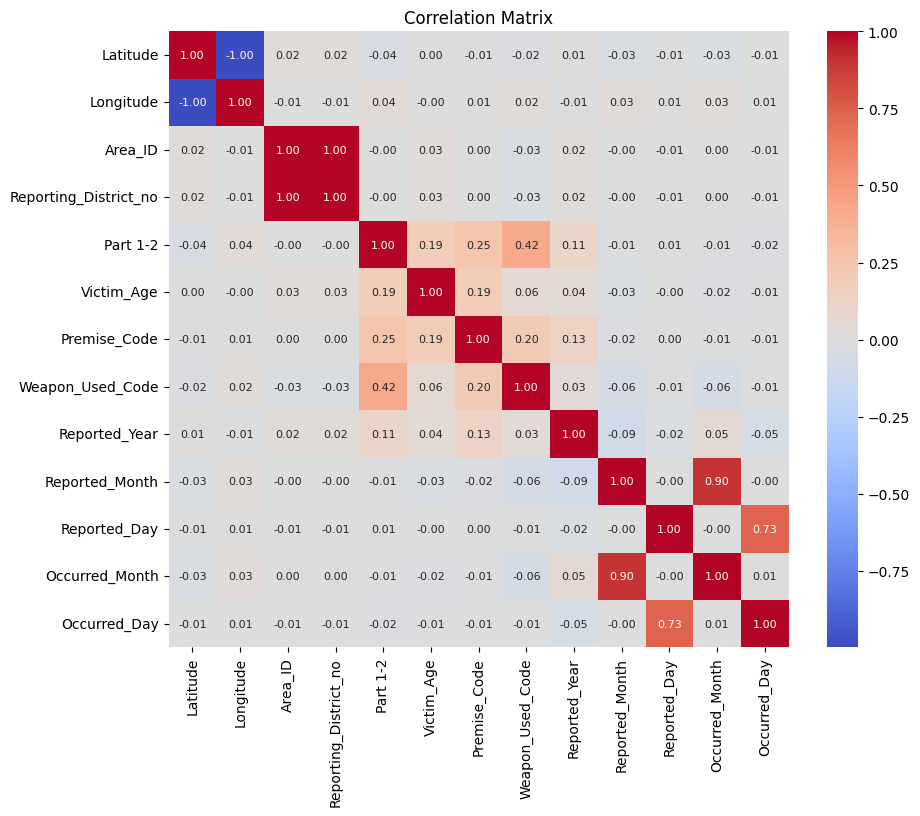

In [20]:
correlation_matrix = train_df[corr_features].corr()

print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap='coolwarm', 
    cbar=True,
    annot_kws={"size": 8}
)
plt.title('Correlation Matrix')
plt.show()

In [21]:
features_to_drop = ['Longitude', 'Reporting_District_no', 'Reported_Month', 'Reported_Day']

X = X.drop(columns=features_to_drop)
test_df = test_df.drop(columns=features_to_drop)

In [22]:
X.shape

(20000, 22)

In [23]:
test_df.shape

(5000, 22)

# TRAIN-TEST SPLIT

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2, 
    random_state=42)

In [25]:
print(X_train.dtypes)

Location                       object
Cross_Street                   object
Latitude                      float64
Date_Reported          datetime64[ns]
Date_Occurred          datetime64[ns]
Time_Occurred          datetime64[ns]
Area_ID                       float64
Area_Name                      object
Part 1-2                      float64
Modus_Operandi                 object
Victim_Age                    float64
Victim_Sex                     object
Victim_Descent                 object
Premise_Code                  float64
Premise_Description            object
Weapon_Used_Code              float64
Weapon_Description             object
Status                         object
Status_Description             object
Reported_Year                 float64
Occurred_Month                float64
Occurred_Day                  float64
dtype: object


**CHANGING DTYPE FOR CONSISTENT DATA FEATURES**

In [26]:
numerical_features = ['Victim_Age']
categorical_features = ['Location', 'Cross_Street', 'Latitude', 'Area_ID', 'Area_Name', 'Part 1-2', 'Modus_Operandi', 'Victim_Sex', 'Victim_Descent'
                       ,'Premise_Code', 'Premise_Description','Weapon_Used_Code', 'Status', 'Status', 'Reported_Year', 'Occurred_Month'
                       ,'Occurred_Day']

In [27]:
for feature in numerical_features:
    X_train[feature] = X_train[feature].astype(float)
    X_test[feature] = X_test[feature].astype(float)


for feature in categorical_features:
    X_train[feature] = X_train[feature].astype(str)
    X_test[feature] = X_test[feature].astype(str)

# **PREPROCESSING**

**ONE-HOT ENCODING, IMPUTING, SCALLING**

In [28]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),  
            ('scaler', StandardScaler())
        ]), numerical_features), 
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')), 
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)  ])

# **MODEL TRAINING**

**LOGISTIC REGRESSION**

In [29]:
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', LogisticRegression())])
grid_search_lr= GridSearchCV(lr_pipeline, param_grid={'classifier__C': [0.1, 1.0, 10.0]}, cv=5)
grid_search_lr.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Victim_Age']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Location',
                                                                          'Cross_Street',
                                                                          'Latitude',
                                                                          'Area_ID',
                                                                          'Area_Name',
                                                                          'Part '
                                                                          '1-2',
                                                                          'Modus_Operandi',
                                                                          'Victim_Sex',
                                                                          'Victim_Descent',
                                                                          'Premise_Code',
                                                                          'Premise_Description',
                                                                          'Weapon_Used_Code',
                                                                          'Status',
                                                                          'Status',
                                                                          'Reported_Year',
                                                                          'Occurred_Month',
                                                                          'Occurred_Day'])])),
                                       ('classifier', LogisticRegression())]),
             param_grid={'classifier__C': [0.1, 1.0, 10.0]})

**K-NEAREST NEIGHBOURS CLASSIFIER**

In [30]:
knn_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', KNeighborsClassifier())])

param_grid_knn = {
    'classifier__n_neighbors': [3, 5, 7]
}
grid_search_knn = GridSearchCV(knn_pipeline, param_grid=param_grid_knn, cv=5)
grid_search_knn.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Victim_Age']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Location',
                                                                          'Cross_Street',
                                                                          'Latitude',
                                                                          'Area_ID',
                                                                          'Area_Name',
                                                                          'Part '
                                                                          '1-2',
                                                                          'Modus_Operandi',
                                                                          'Victim_Sex',
                                                                          'Victim_Descent',
                                                                          'Premise_Code',
                                                                          'Premise_Description',
                                                                          'Weapon_Used_Code',
                                                                          'Status',
                                                                          'Status',
                                                                          'Reported_Year',
                                                                          'Occurred_Month',
                                                                          'Occurred_Day'])])),
                                       ('classifier', KNeighborsClassifier())]),
             param_grid={'classifier__n_neighbors': [3, 5, 7]})

**DECISION TREE CLASSIFIER**

In [31]:
dt_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', DecisionTreeClassifier())])

param_grid_dt = {
    'classifier__max_depth': [None, 10, 20]
}
grid_search_dt = GridSearchCV(dt_pipeline, param_grid=param_grid_dt, cv=5)
grid_search_dt.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Victim_Age']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Location',
                                                                          'Cross_Street',
                                                                          'Latitude',
                                                                          'Area_ID',
                                                                          'Area_Name',
                                                                          'Part '
                                                                          '1-2',
                                                                          'Modus_Operandi',
                                                                          'Victim_Sex',
                                                                          'Victim_Descent',
                                                                          'Premise_Code',
                                                                          'Premise_Description',
                                                                          'Weapon_Used_Code',
                                                                          'Status',
                                                                          'Status',
                                                                          'Reported_Year',
                                                                          'Occurred_Month',
                                                                          'Occurred_Day'])])),
                                       ('classifier',
                                        DecisionTreeClassifier())]),
             param_grid={'classifier__max_depth': [None, 10, 20]})

**RIDGE CLASSIFIER**

In [32]:
ridge_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('classifier', RidgeClassifier())])

param_grid_ridge = {
    'classifier__alpha': [0.1, 1.0, 10.0]
}
grid_search_ridge = GridSearchCV(ridge_pipeline, param_grid=param_grid_ridge, cv=5)
grid_search_ridge.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Victim_Age']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Location',
                                                                          'Cross_Street',
                                                                          'Latitude',
                                                                          'Area_ID',
                                                                          'Area_Name',
                                                                          'Part '
                                                                          '1-2',
                                                                          'Modus_Operandi',
                                                                          'Victim_Sex',
                                                                          'Victim_Descent',
                                                                          'Premise_Code',
                                                                          'Premise_Description',
                                                                          'Weapon_Used_Code',
                                                                          'Status',
                                                                          'Status',
                                                                          'Reported_Year',
                                                                          'Occurred_Month',
                                                                          'Occurred_Day'])])),
                                       ('classifier', RidgeClassifier())]),
             param_grid={'classifier__alpha': [0.1, 1.0, 10.0]})

# **MODEL EVALUATION**

In [33]:
best_lr_model = grid_search_lr.best_estimator_

best_params_lr = grid_search_lr.best_params_

y_pred_lr = best_lr_model.predict(X_test)

Best Hyperparameter: {'classifier__C': 1.0}
Test Set Accuracy: 0.8725

Classification Report:
                               precision    recall  f1-score   support

       Crimes against Persons       0.36      0.16      0.22        32
  Crimes against Public Order       0.75      0.64      0.69       374
Fraud and White-Collar Crimes       0.78      0.83      0.80       267
                 Other Crimes       0.10      0.03      0.04        35
              Property Crimes       0.94      0.93      0.93      2303
               Violent Crimes       0.81      0.90      0.85       989

                     accuracy                           0.87      4000
                    macro avg       0.62      0.58      0.59      4000
                 weighted avg       0.87      0.87      0.87      4000



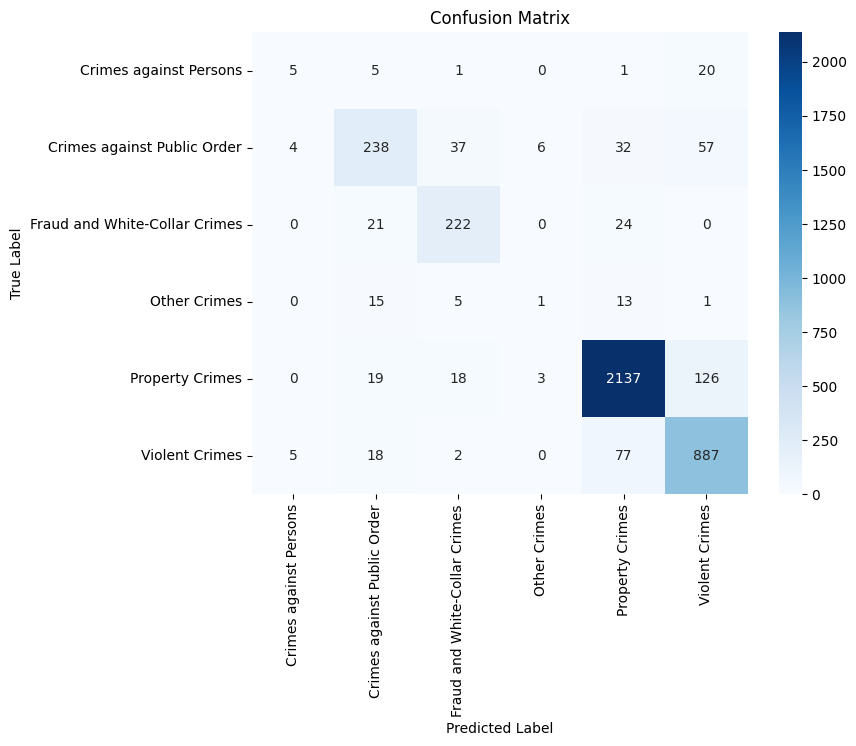

In [34]:
test_accuracy_lr = accuracy_score(y_test, y_pred_lr)

print(f"Best Hyperparameter: {best_params_lr}")

print(f"Test Set Accuracy: {test_accuracy_lr:.4f}")

report = classification_report(y_test, y_pred_lr)
print("\nClassification Report:")
print(report)

cm = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=True,
            xticklabels=best_lr_model.classes_,
            yticklabels=best_lr_model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

The **LR** model excels at predicting **Property Crimes**, correctly identifying 93% of the instances with a high level of precision and recall. This indicates that the model is highly reliable for this category.

The **LR** model performs very poorly in predicting **Other Crimes**, with only 3% of these crimes correctly identified. The low precision, recall, and F1-score indicate that the model almost fails to distinguish this category.

In [35]:
best_knn_model = grid_search_knn.best_estimator_

best_params_knn = grid_search_knn.best_params_

y_pred_knn = best_knn_model.predict(X_test)

Best Hyperparameters: {'classifier__n_neighbors': 7}
Test Set Accuracy: 0.8087

Classification Report:
                               precision    recall  f1-score   support

       Crimes against Persons       0.45      0.16      0.23        32
  Crimes against Public Order       0.60      0.37      0.45       374
Fraud and White-Collar Crimes       0.68      0.65      0.67       267
                 Other Crimes       0.50      0.06      0.10        35
              Property Crimes       0.84      0.94      0.89      2303
               Violent Crimes       0.81      0.77      0.79       989

                     accuracy                           0.81      4000
                    macro avg       0.65      0.49      0.52      4000
                 weighted avg       0.79      0.81      0.80      4000



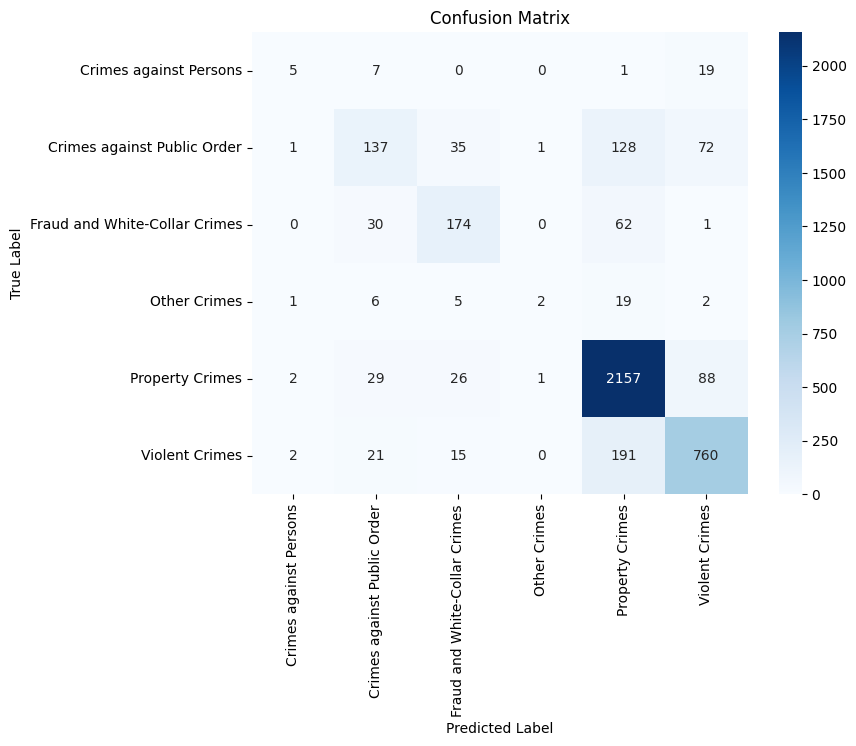

In [36]:
test_accuracy_knn = accuracy_score(y_test, y_pred_knn)

print(f"Best Hyperparameters: {best_params_knn}")

print(f"Test Set Accuracy: {test_accuracy_knn:.4f}")

report = classification_report(y_test, y_pred_knn)
print("\nClassification Report:")
print(report)

cm = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=True,
            xticklabels=best_knn_model.classes_,
            yticklabels=best_knn_model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

The **KNN** model excels at predicting **Property Crimes**, correctly identifying 94% of the instances with a high level of precision and recall. This indicates that the model is highly reliable for this category.

The **KNN** model performs very poorly in predicting **Other Crimes**, with only 6% of these crimes correctly identified. The low precision, recall, and F1-score indicate that the model almost fails to distinguish this category.

In [37]:
best_dt_model = grid_search_dt.best_estimator_

best_params_dt = grid_search_dt.best_params_

y_pred_dt = best_dt_model.predict(X_test)

Best Hyperparameters: {'classifier__max_depth': 20}
Test Set Accuracy: 0.8670

Classification Report:
                               precision    recall  f1-score   support

       Crimes against Persons       0.57      0.50      0.53        32
  Crimes against Public Order       0.70      0.55      0.62       374
Fraud and White-Collar Crimes       0.70      0.89      0.79       267
                 Other Crimes       0.16      0.09      0.11        35
              Property Crimes       0.95      0.92      0.93      2303
               Violent Crimes       0.81      0.90      0.86       989

                     accuracy                           0.87      4000
                    macro avg       0.65      0.64      0.64      4000
                 weighted avg       0.87      0.87      0.86      4000



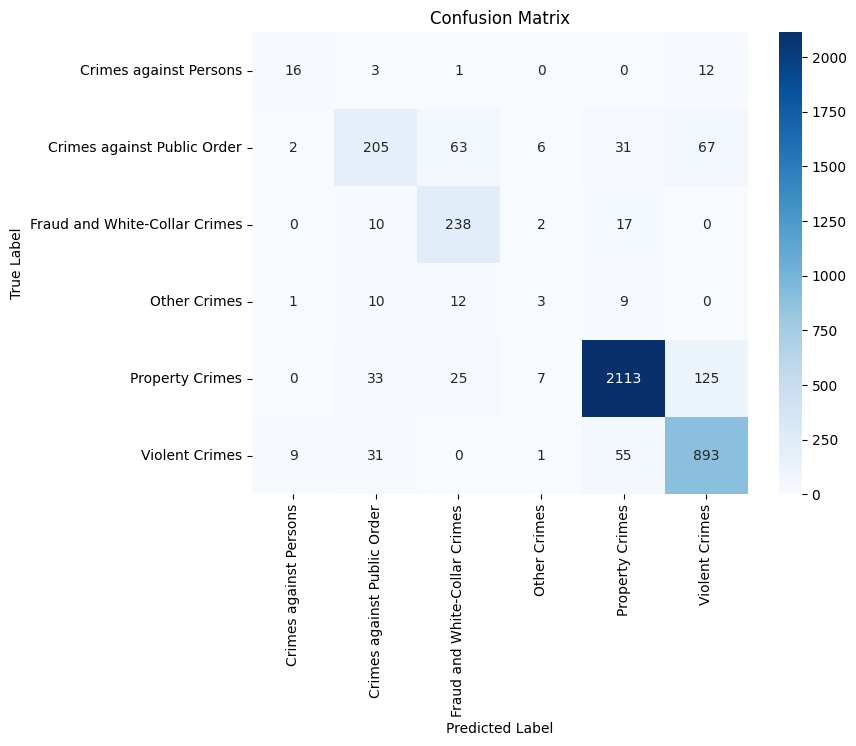

In [38]:
test_accuracy_dt = accuracy_score(y_test, y_pred_dt)

print(f"Best Hyperparameters: {best_params_dt}")

print(f"Test Set Accuracy: {test_accuracy_dt:.4f}")

report = classification_report(y_test, y_pred_dt)
print("\nClassification Report:")
print(report)

cm = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=True,
            xticklabels=best_dt_model.classes_,
            yticklabels=best_dt_model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

The **DT** model excels at predicting **Property Crimes**, correctly identifying 92% of the instances with a high level of precision and recall. This indicates that the model is highly reliable for this category.

The **DT** model performs very poorly in predicting **Other Crimes**, with only 9% of these crimes correctly identified. The low precision, recall, and F1-score indicate that the model almost fails to distinguish this category.

In [39]:
best_rd_model = grid_search_ridge.best_estimator_

best_params_rd = grid_search_ridge.best_params_

y_pred_rd = best_rd_model.predict(X_test)

Best Hyperparameters: {'classifier__alpha': 10.0}
Test Set Accuracy: 0.8585

Classification Report:
                               precision    recall  f1-score   support

       Crimes against Persons       0.00      0.00      0.00        32
  Crimes against Public Order       0.82      0.55      0.66       374
Fraud and White-Collar Crimes       0.87      0.70      0.78       267
                 Other Crimes       0.33      0.03      0.05        35
              Property Crimes       0.90      0.92      0.91      2303
               Violent Crimes       0.78      0.92      0.84       989

                     accuracy                           0.86      4000
                    macro avg       0.62      0.52      0.54      4000
                 weighted avg       0.85      0.86      0.85      4000



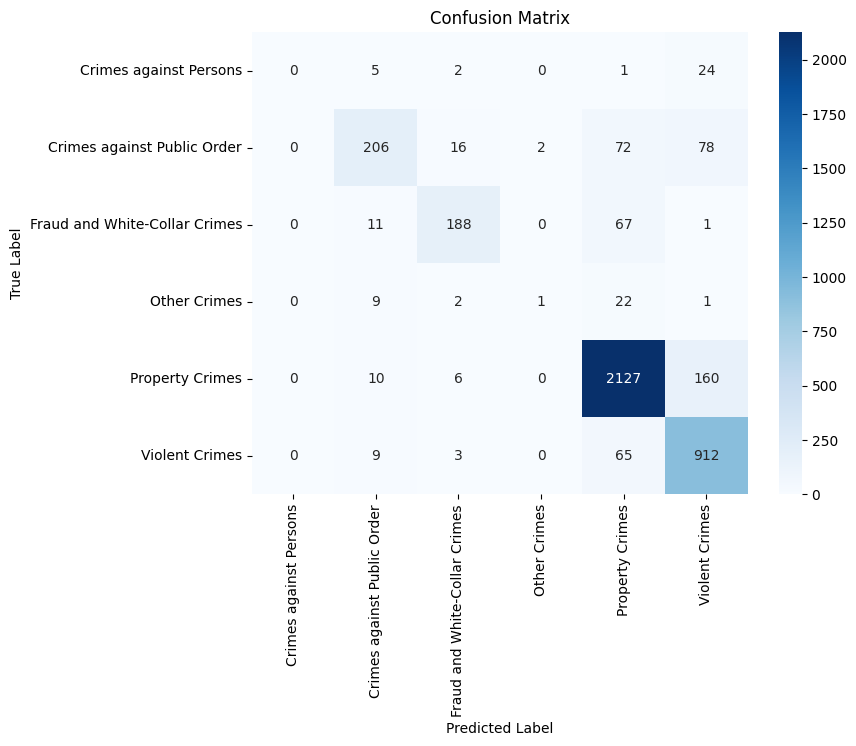

In [40]:
test_accuracy_rd = accuracy_score(y_test, y_pred_rd)

print(f"Best Hyperparameters: {best_params_rd}")

print(f"Test Set Accuracy: {test_accuracy_rd:.4f}")

report = classification_report(y_test, y_pred_rd)
print("\nClassification Report:")
print(report)

cm = confusion_matrix(y_test, y_pred_rd)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=True,
            xticklabels=best_rd_model.classes_,
            yticklabels=best_rd_model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

The **RD** model excels at predicting **Property Crimes** & **Violent Crimes**, correctly identifying 92% of the instances with a high level of precision and recall. This indicates that the model is highly reliable for this category.

The **RD** model performs very poorly in predicting **Other Crimes**, with only 3% of these crimes correctly identified. The low precision, recall, and F1-score indicate that the model almost fails to distinguish this category.# **USING LOGREG BECAUSE OF HIGHEST ACCURACY**

                         Model  Accuracy
0                     Logistic   0.87250
2     Decision Tree Classifier   0.86700
3  Ridge Regression Classifier   0.85850
1                          KNN   0.80875


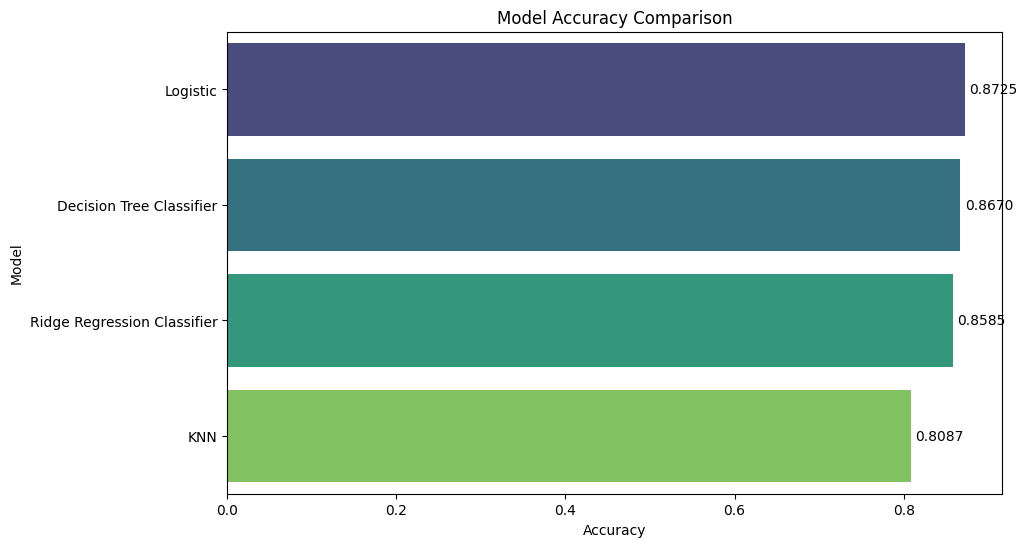

In [41]:
models = pd.DataFrame({'Model': ['Logistic', 'KNN', 'Decision Tree Classifier',
                       'Ridge Regression Classifier'],
                       'Accuracy': [ test_accuracy_lr,test_accuracy_knn, test_accuracy_dt,test_accuracy_rd]})

models_sorted = models.sort_values(by = 'Accuracy', ascending = False)

print(models_sorted)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Accuracy', y='Model', data=models_sorted, palette='viridis')

for container in ax.containers:
    ax.bar_label(container, fmt='%.4f', padding=3)

plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.title('Model Accuracy Comparison')
plt.show()

# **Using Logistic Regression becaue of Highest Accuracy**

In [42]:
best_lr_model.fit(X, y)

y_pred_test = best_lr_model.predict(test_df)

# **SUBMISSION**

In [43]:
submission = pd.DataFrame({
    'ID': range(1, len(y_pred_test) + 1),
    'Crime_Category': y_pred_test
})

In [44]:
submission.shape

(5000, 2)

In [45]:
print("Submission info:")
print(submission.info())

Submission info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              5000 non-null   int64 
 1   Crime_Category  5000 non-null   object
dtypes: int64(1), object(1)
memory usage: 78.2+ KB
None


In [46]:
category_counts = submission['Crime_Category'].value_counts()
print(category_counts)

Crime_Category
Property Crimes                  2966
Violent Crimes                   1389
Fraud and White-Collar Crimes     315
Crimes against Public Order       302
Crimes against Persons             16
Other Crimes                       12
Name: count, dtype: int64


MAJORITY OF CRIMES PREDICTER ARE PROPERTY CRIMES FOLLOWED BY VIOLENT CRIMES

CRIME AGAINST PERSONS ARE THE LOWEST

NEED TO RAISE THE MATTER OF PROPERTY CRIMES WITH THE CRIME DEPARTMENT

In [47]:
submission

,ID,Crime_Category
0,1,Violent Crimes
1,2,Property Crimes
2,3,Violent Crimes
3,4,Property Crimes
4,5,Crimes against Public Order
...,...,...
4995,4996,Property Crimes
4996,4997,Property Crimes
4997,4998,Violent Crimes
4998,4999,Violent Crimes


In [48]:
submission.to_csv('submission.csv',index=False)